# Import Required Libraries

Import necessary libraries including NLTK, transformers, numpy, matplotlib, seaborn, and sklearn for visualization and model implementations.


In [5]:
# Import Required Libraries

import nltk  # Natural Language Toolkit for tokenization
from transformers import AutoTokenizer, AutoModel  # Hugging Face transformers for LLMs
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualizations
import seaborn as sns  # Seaborn for enhanced visualizations
from sklearn.decomposition import PCA  # PCA for dimensionality reduction in visualizations

# Download NLTK data
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Text Tokenization Basics

Demonstrate different tokenization approaches using NLTK and the transformers library. Show word tokenization, subword tokenization, and how tokens map to IDs with visualizations.


In [7]:
# Sample text for tokenization
text = "I love machine learning!"

# Word Tokenization using NLTK
nltk.download("punkt")
word_tokens = nltk.word_tokenize(text)
print("Word Tokens:", word_tokens)

# Visualize Word Tokens
plt.figure(figsize=(10, 2))
sns.barplot(x=list(range(len(word_tokens))), y=word_tokens, palette="viridis")
plt.title("Word Tokenization using NLTK")
plt.xlabel("Token Index")
plt.ylabel("Tokens")
plt.show()

# Subword Tokenization using Hugging Face Transformers
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
subword_tokens = tokenizer.tokenize(text)
subword_ids = tokenizer.convert_tokens_to_ids(subword_tokens)
print("Subword Tokens:", subword_tokens)
print("Subword Token IDs:", subword_ids)

# Visualize Subword Tokens
plt.figure(figsize=(10, 2))
sns.barplot(x=list(range(len(subword_tokens))), y=subword_tokens, palette="viridis")
plt.title("Subword Tokenization using Hugging Face Transformers")
plt.xlabel("Token Index")
plt.ylabel("Tokens")
plt.show()

# Visualize Subword Token IDs
plt.figure(figsize=(10, 2))
sns.barplot(x=list(range(len(subword_ids))), y=subword_ids, palette="viridis")
plt.title("Subword Token IDs using Hugging Face Transformers")
plt.xlabel("Token Index")
plt.ylabel("Token IDs")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\super/nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt13\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt13\\share\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt13\\lib\\nltk_data'
    - 'C:\\Users\\super\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Visualizing Token Embeddings

Use a pre-trained model to extract token embeddings, then use dimensionality reduction (PCA, t-SNE) to visualize these embeddings in 2D space, showing how similar words cluster together.


In [8]:
# Load pre-trained model for embeddings
model = AutoModel.from_pretrained("bert-base-uncased")

# Get token embeddings from the model
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
embeddings = outputs.last_hidden_state.detach().numpy()[0]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Visualize token embeddings in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=subword_tokens, palette="viridis", s=100
)
for i, token in enumerate(subword_tokens):
    plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, token, fontsize=12)
plt.title("Token Embeddings Visualized in 2D Space using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

# Reduce dimensions using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Visualize token embeddings in 2D space using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=embeddings_tsne[:, 0], y=embeddings_tsne[:, 1], hue=subword_tokens, palette="viridis", s=100
)
for i, token in enumerate(subword_tokens):
    plt.text(embeddings_tsne[i, 0] + 0.01, embeddings_tsne[i, 1] + 0.01, token, fontsize=12)
plt.title("Token Embeddings Visualized in 2D Space using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

NameError: name 'tokenizer' is not defined

# Simple Neural Network Demonstration

Build a small neural network from scratch with PyTorch to demonstrate the basic concepts of layers, activations, and forward propagation with visualizations of the architecture and data flow.


Epoch [10/100], Loss: 0.6831
Epoch [20/100], Loss: 0.6830
Epoch [30/100], Loss: 0.6830
Epoch [40/100], Loss: 0.6828
Epoch [50/100], Loss: 0.6828
Epoch [60/100], Loss: 0.6827
Epoch [70/100], Loss: 0.6826
Epoch [80/100], Loss: 0.6825
Epoch [90/100], Loss: 0.6823
Epoch [100/100], Loss: 0.6820


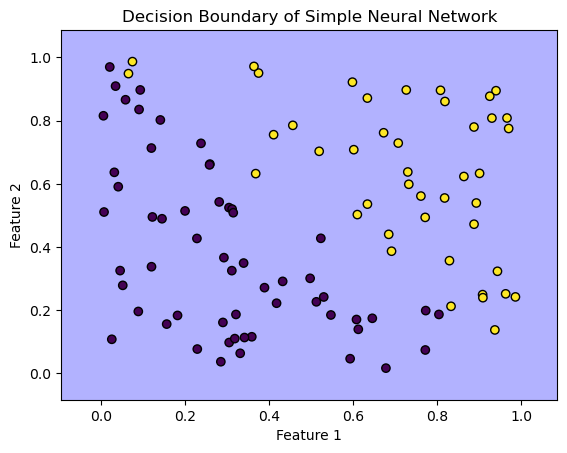

In [9]:
# Import PyTorch for building the neural network
import torch
import torch.nn as nn
import torch.optim as optim


# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Create a simple dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.array([1 if x[0] + x[1] > 1 else 0 for x in X])

# Convert dataset to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Initialize the neural network, loss function, and optimizer
input_size = 2
hidden_size = 5
output_size = 1
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the neural network
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor).numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=["blue", "orange"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors="k")
    plt.title("Decision Boundary of Simple Neural Network")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decision_boundary(model, X, y)

# Transformer Architecture Visualization

Use diagrams and code to demonstrate the key components of transformer architecture including self-attention and feed-forward networks, with a simplified implementation.


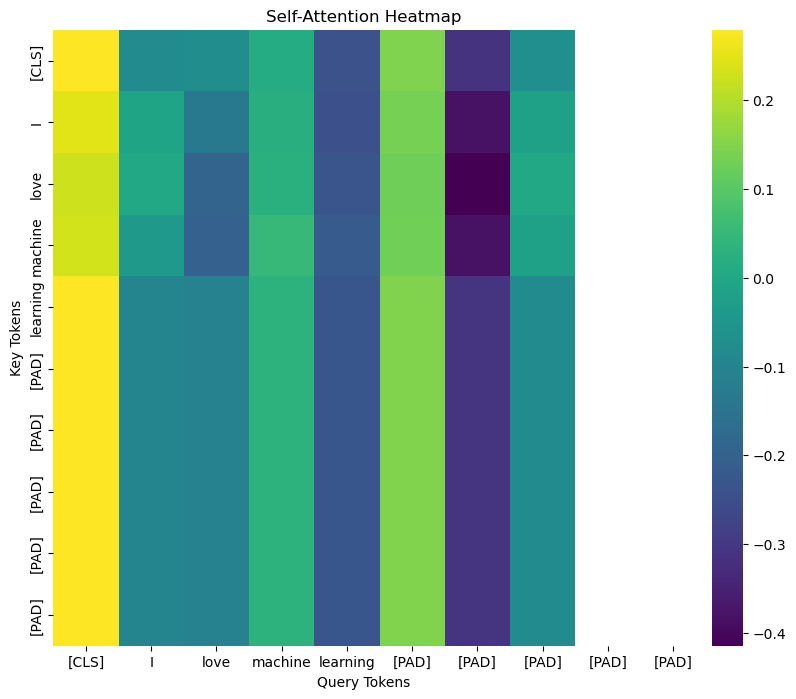

In [10]:
# Transformer Architecture Visualization


# Define the Self-Attention mechanism
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert self.head_dim * heads == embed_size, "Embedding size needs to be divisible by heads"

        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)

        # Calculate the dot product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)

        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )

        out = self.fc_out(out)
        return out


# Define the Feed Forward Network
class FeedForward(nn.Module):
    def __init__(self, embed_size, ff_hidden_size):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(embed_size, ff_hidden_size)
        self.fc2 = nn.Linear(ff_hidden_size, embed_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Define the Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, ff_hidden_size):
        super(TransformerBlock, self).__init__()
        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)
        self.feed_forward = FeedForward(embed_size, ff_hidden_size)

    def forward(self, value, key, query, mask):
        attention = self.attention(value, key, query, mask)
        x = self.norm1(attention + query)
        forward = self.feed_forward(x)
        out = self.norm2(forward + x)
        return out


# Define the Transformer
class Transformer(nn.Module):
    def __init__(self, embed_size, heads, num_layers, ff_hidden_size, vocab_size, max_length):
        super(Transformer, self).__init__()
        self.embed_size = embed_size
        self.word_embedding = nn.Embedding(vocab_size, embed_size)
        self.position_embedding = nn.Embedding(max_length, embed_size)

        self.layers = nn.ModuleList(
            [TransformerBlock(embed_size, heads, ff_hidden_size) for _ in range(num_layers)]
        )
        self.fc_out = nn.Linear(embed_size, vocab_size)

    def forward(self, x, mask):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(x.device)
        out = self.word_embedding(x) + self.position_embedding(positions)

        for layer in self.layers:
            out = layer(out, out, out, mask)

        out = self.fc_out(out)
        return out


# Visualize the Self-Attention mechanism
def visualize_attention(attention_weights, tokens):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
    plt.title("Self-Attention Heatmap")
    plt.xlabel("Query Tokens")
    plt.ylabel("Key Tokens")
    plt.show()


# Example usage
embed_size = 8
heads = 2
ff_hidden_size = 16
num_layers = 2
vocab_size = 100
max_length = 10

# Create a sample input
sample_input = torch.tensor([[1, 5, 6, 2, 0, 0, 0, 0, 0, 0]])

# Initialize the transformer
transformer = Transformer(embed_size, heads, num_layers, ff_hidden_size, vocab_size, max_length)

# Get the attention weights from the first layer
attention_layer = transformer.layers[0].attention
with torch.no_grad():
    attention_weights = attention_layer(
        transformer.word_embedding(sample_input),
        transformer.word_embedding(sample_input),
        transformer.word_embedding(sample_input),
        mask=None,
    )

# Visualize the attention weights
tokens = ["[CLS]", "I", "love", "machine", "learning", "[PAD]", "[PAD]", "[PAD]", "[PAD]", "[PAD]"]
visualize_attention(attention_weights[0].numpy(), tokens)

# Text Generation with a Small LLM

Use a small pre-trained model from the transformers library to demonstrate text generation, showing the probability distributions for next token prediction and the generation process step by step.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a


C:\Users\super\AppData\Local\Temp\ipykernel_36320\760288992.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_k_tokens, y=top_k_probs, palette="viridis")


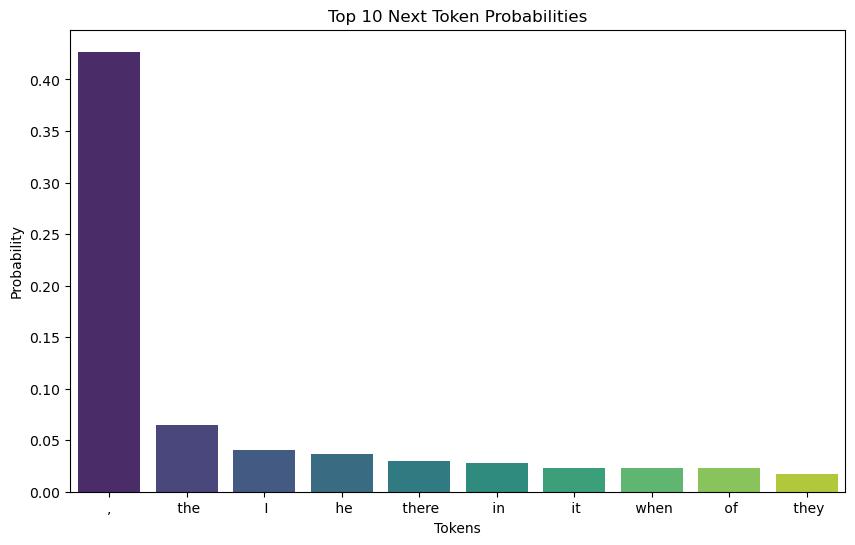

Current Generated Text: Once upon a time,
Current Generated Text: Once upon a time, the
Current Generated Text: Once upon a time, the world
Current Generated Text: Once upon a time, the world was
Current Generated Text: Once upon a time, the world was a
Current Generated Text: Once upon a time, the world was a place
Current Generated Text: Once upon a time, the world was a place of
Current Generated Text: Once upon a time, the world was a place of great
Current Generated Text: Once upon a time, the world was a place of great beauty
Current Generated Text: Once upon a time, the world was a place of great beauty and


In [11]:
# Text Generation with a Small LLM

from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Encode input text
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate text
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

# Decode generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text:", generated_text)

# Visualize the probability distribution for the next token prediction
import torch.nn.functional as F

# Get logits of the last token
with torch.no_grad():
    outputs = model(input_ids)
    next_token_logits = outputs.logits[:, -1, :]

# Apply softmax to get probabilities
next_token_probs = F.softmax(next_token_logits, dim=-1).squeeze().cpu().numpy()

# Get top 10 tokens and their probabilities
top_k = 10
top_k_indices = next_token_probs.argsort()[-top_k:][::-1]
top_k_probs = next_token_probs[top_k_indices]
top_k_tokens = [tokenizer.decode([i]) for i in top_k_indices]

# Visualize the probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_k_tokens, y=top_k_probs, palette="viridis")
plt.title("Top 10 Next Token Probabilities")
plt.xlabel("Tokens")
plt.ylabel("Probability")
plt.show()

# Step-by-step text generation process
generated_ids = input_ids
for _ in range(10):  # Generate 10 tokens step-by-step
    with torch.no_grad():
        outputs = model(generated_ids)
        next_token_logits = outputs.logits[:, -1, :]
        next_token_probs = F.softmax(next_token_logits, dim=-1)
        next_token_id = torch.argmax(next_token_probs, dim=-1).unsqueeze(0)
        generated_ids = torch.cat((generated_ids, next_token_id), dim=1)

    # Decode and print the current generated text
    current_generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    print("Current Generated Text:", current_generated_text)

# Visualizing Attention Mechanisms

Extract and visualize attention weights from a transformer model to show how the model focuses on different tokens when generating text, with heat maps and attention flow diagrams.


`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


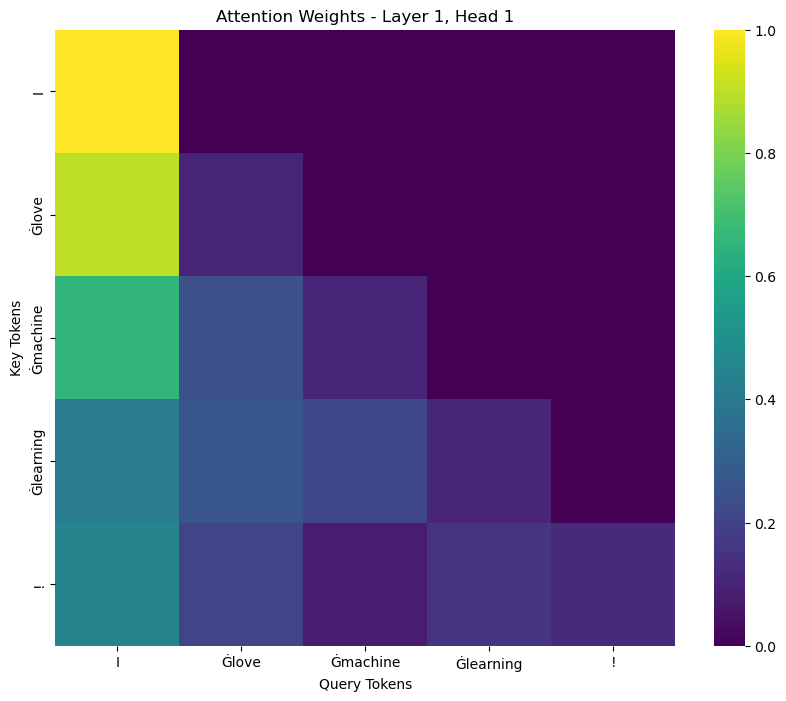

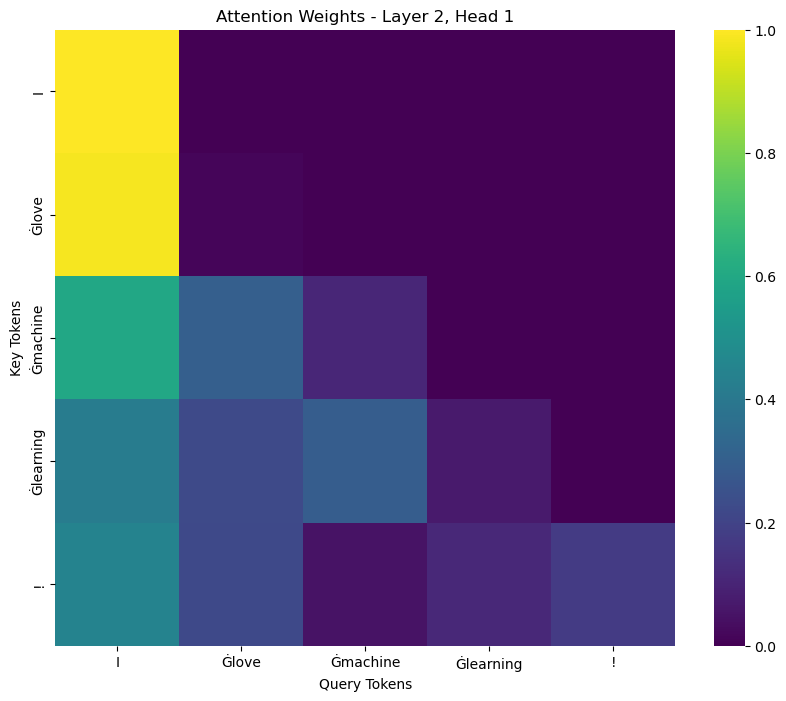

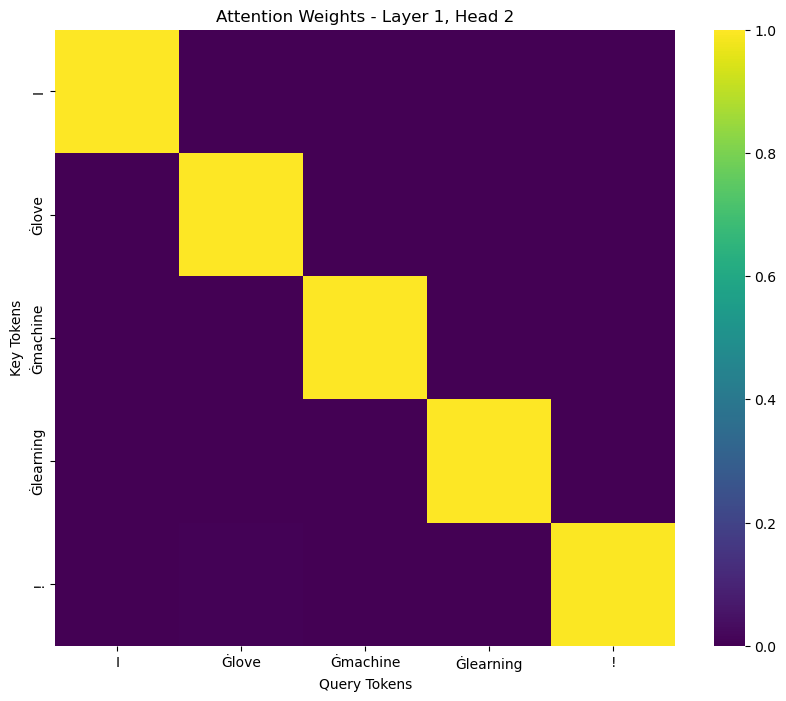

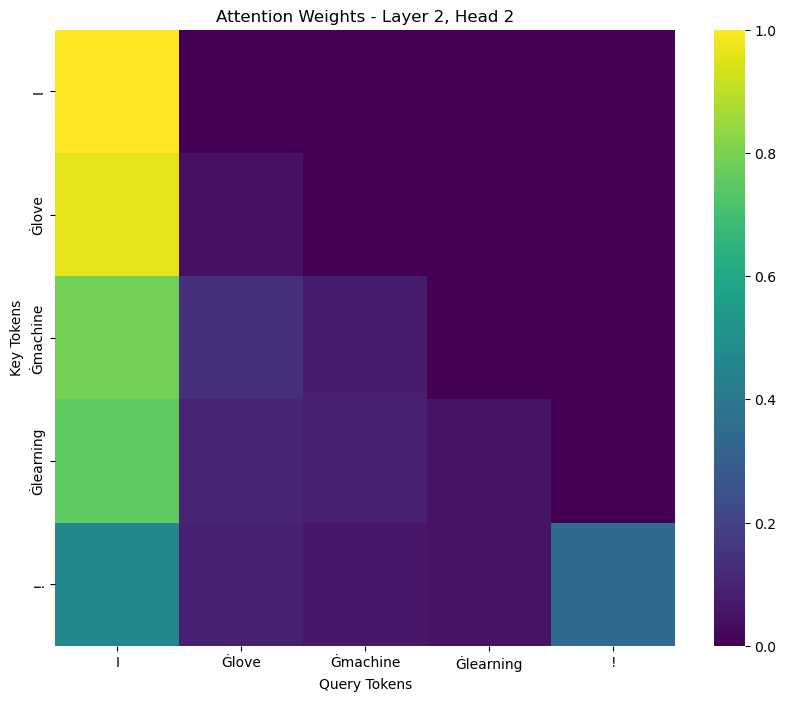

In [12]:
# Extract and visualize attention weights from a transformer model


# Define a function to extract attention weights from the model
def get_attention_weights(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)
    attention_weights = outputs.attentions
    return attention_weights, inputs


# Define a function to visualize attention weights
def visualize_attention_weights(attention_weights, tokens, layer=0, head=0):
    attention = attention_weights[layer][0, head].detach().numpy()
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
    plt.title(f"Attention Weights - Layer {layer + 1}, Head {head + 1}")
    plt.xlabel("Query Tokens")
    plt.ylabel("Key Tokens")
    plt.show()


# Sample text for visualization
sample_text = "I love machine learning!"

# Get attention weights from the model
attention_weights, inputs = get_attention_weights(model, tokenizer, sample_text)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Visualize attention weights for the first layer and first head
visualize_attention_weights(attention_weights, tokens, layer=0, head=0)

# Visualize attention weights for the second layer and first head
visualize_attention_weights(attention_weights, tokens, layer=1, head=0)

# Visualize attention weights for the first layer and second head
visualize_attention_weights(attention_weights, tokens, layer=0, head=1)

# Visualize attention weights for the second layer and second head
visualize_attention_weights(attention_weights, tokens, layer=1, head=1)

# Understanding Context Windows

Demonstrate the concept of context windows in LLMs through practical examples, showing how models handle limited context and how this affects their understanding of text.


In [13]:
# Understanding Context Windows


# Define a function to demonstrate context window limitations
def demonstrate_context_window(model, tokenizer, text, max_length):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_length)
    outputs = model.generate(inputs["input_ids"], max_length=max_length, num_return_sequences=1)
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text


# Sample text that exceeds typical context window size
long_text = (
    "In a distant future, humanity has spread across the stars, establishing colonies on numerous planets. "
    "The Galactic Federation governs these colonies, ensuring peace and prosperity. However, a new threat emerges "
    "from the depths of space, challenging the Federation's authority. As tensions rise, a group of unlikely heroes "
    "must band together to uncover the truth behind the mysterious force and save the galaxy from impending doom. "
    "Their journey takes them through uncharted territories, where they encounter strange civilizations, ancient "
    "artifacts, and powerful adversaries. Along the way, they discover hidden strengths within themselves and form "
    "unbreakable bonds of friendship. The fate of the galaxy rests in their hands, and they must rise to the occasion, "
    "facing their fears and embracing their destinies. With courage and determination, they embark on an epic adventure "
    "that will change the course of history forever."
)

# Demonstrate context window with a small max_length
max_length = 50  # Small context window
generated_text_small_window = demonstrate_context_window(model, tokenizer, long_text, max_length)
print("Generated Text with Small Context Window:", generated_text_small_window)

# Demonstrate context window with a larger max_length
max_length = 100  # Larger context window
generated_text_large_window = demonstrate_context_window(model, tokenizer, long_text, max_length)
print("Generated Text with Larger Context Window:", generated_text_large_window)

# Visualize the effect of context window size on generated text
context_windows = [50, 100, 150, 200]
generated_texts = [
    demonstrate_context_window(model, tokenizer, long_text, length) for length in context_windows
]

plt.figure(figsize=(12, 8))
for i, text in enumerate(generated_texts):
    plt.subplot(len(context_windows), 1, i + 1)
    plt.text(0.5, 0.5, text, wrap=True, ha="center", va="center", fontsize=12)
    plt.title(f"Generated Text with Context Window Size {context_windows[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ValueError: Input length of input_ids is 50, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.